In [181]:
# NAME: Amit Roy
# BATCH: JULY21
# GRIP TASK 1 - Prediction using Supervised ML
# Predict the percentage of an student based on the no. of study hours

In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [167]:
# Importing the Data 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [168]:
# To find if any Null Value is Present 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [169]:
# To see summary statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


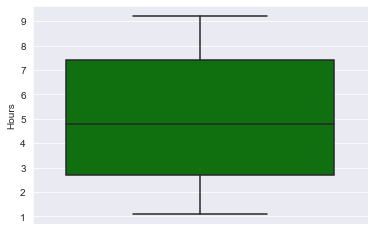

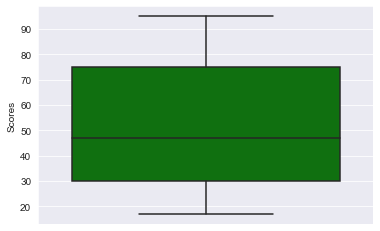

In [170]:
# To find outliers 
outl=data.columns
for i in outl:
    sns.boxplot(y=df[i],color="g")
    plt.show()

Text(0, 0.5, 'Marks Percentage')

<Figure size 1080x1800 with 0 Axes>

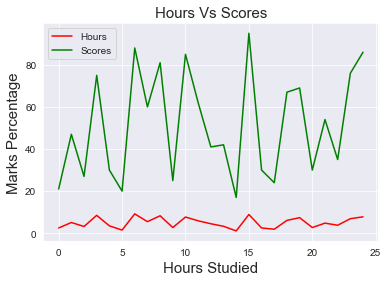

In [171]:
## Data visualization with Line Plot
plt.figure(figsize=(15,25))
data.plot(kind="line",color=["r","g"])
plt.title("Hours Vs Scores", size=15)
plt.xlabel("Hours Studied", size=15)
plt.ylabel("Marks Percentage",size=15)

Text(0, 0.5, 'Marks Percentage')

<Figure size 1440x1800 with 0 Axes>

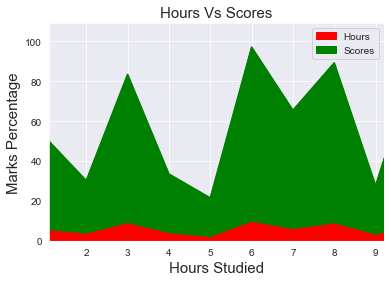

In [172]:
## Data visualization with Area Plot
xmax = max(data.Hours)
xmin = min(data.Hours)
plt.figure(figsize=(20,25))
data.plot(kind="area",xlim=(xmin,xmax),color=["r","g"])
plt.title("Hours Vs Scores", size=15)
plt.xlabel("Hours Studied", size=15)
plt.ylabel("Marks Percentage",size=15)

Text(0, 0.5, 'Marks Percentage')

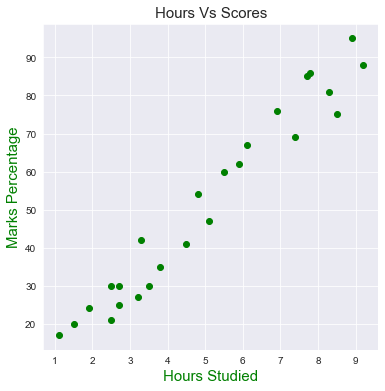

In [173]:
## Data visualization with Scatterplot
sns.set_style("darkgrid")
plt.figure(figsize=(6,6))
y=data["Scores"]
x=data["Hours"]
plt.scatter(x, y,color="g")
plt.title("Hours Vs Scores", size=15)
plt.xlabel("Hours Studied", size=15,color="g")
plt.ylabel("Marks Percentage",size=15,color="g")

In [ ]:
# From above Data Visualization there looks to be correlation between the "Marks Percentage" and " Hours studies"

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


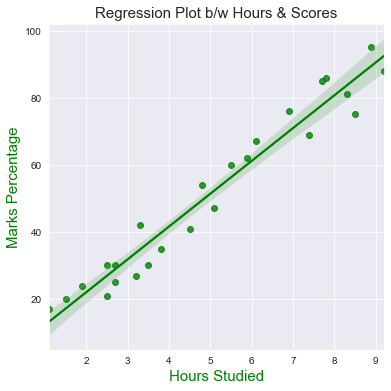

In [174]:
## Let plot a regression line to confirm the correlation between the ' Marks Percentage' and 'Hours Studies'
sns.set_style("darkgrid")
plt.figure(figsize=(6,6))
sns.regplot(y=data["Scores"],x=data["Hours"],color="g")
plt.title("Regression Plot b/w Hours & Scores", size=15)
plt.xlabel("Hours Studied", size=15,color="g")
plt.ylabel("Marks Percentage",size=15,color="g")
print(data.corr())

In [ ]:
# It is confirmed that the variable are positively correlated

In [175]:
#Creating Model
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

In [152]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [176]:

compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


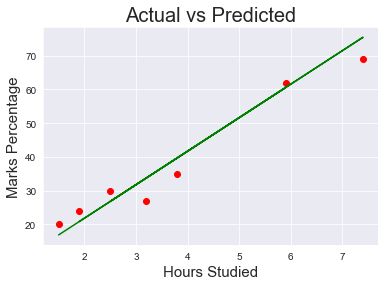

In [177]:
plt.scatter(x=val_X, y=val_y, color='r')
plt.plot(val_X, pred_y, color='g')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [178]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


In [179]:
hours = [7]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 71.524


In [180]:
 # According to the regression model if a student studies for 7 hours a day he/she is likely to score 71.524 marks.